In [243]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import locale
import matplotlib.ticker as mticker 

In [248]:
# Import in CSV files from resources 
global_space_launches_to_load = "resources\global_space_launches.csv"
important_missions_to_load = "resources\important_missions.csv"
cost_data_to_load = "resources\COST_DATA.csv"

global_space_launches= pd.read_csv(global_space_launches_to_load)
important_missions= pd.read_csv(important_missions_to_load)
cost_data = pd.read_csv(cost_data_to_load)


In [249]:
cost_data

,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,"$80,000,000.00","$85,000,000"
1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900","$110,000,000.00","$230,000,000"
2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,"$164,000,000.00","$400,000,000"
3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850","$61,200,000",NaN
4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,"$40,000,000.00","$50,000,000"
5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,"$40,000,000",NaN
6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,"$10,000,000",NaN
7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,"$250,000",NaN
8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700","$270,000,000",NaN
9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,"$10,000,000",NaN


In [251]:
cost_data.dtypes

Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Total_2017_Launches     float64
Active_Launch_Sites      object
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Min_Mass_to_Sso_kg      float64
Max_Mass_to_SSO_kg       object
Min_Mass_to_GTO_kg       object
Max_Mass_to_GTO_kg       object
Cost_Min                 object
Cost_Max                 object
dtype: object

In [252]:
cost_data['Cost_Min'] = cost_data['Cost_Min'].str.replace(',', '')
cost_data['Cost_Min'] = cost_data['Cost_Min'].str.replace('$', '')
cost_data['Cost_Min'] 

0      80000000.00
1     110000000.00
2     164000000.00
3         61200000
4      40000000.00
5         40000000
6         10000000
7           250000
8        270000000
9         10000000
10             NaN
11             NaN
12             NaN
13         3000000
14     85000000.00
Name: Cost_Min, dtype: object

In [253]:
cost_data = cost_data.dropna(subset=['Cost_Min'])
cost_data

,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,80000000.00,"$85,000,000"
1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900",110000000.00,"$230,000,000"
2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,164000000.00,"$400,000,000"
3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850",61200000,NaN
4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,40000000.00,"$50,000,000"
5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,40000000,NaN
6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,10000000,NaN
7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,250000,NaN
8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700",270000000,NaN
9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,10000000,NaN


In [257]:
cost_data['Cost_Min'] = cost_data['Cost_Min'].astype(float)

<ipython-input-257-1a3a4ba31b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Min'] = cost_data['Cost_Min'].astype(float)


In [258]:
cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace(',', '')
cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace('$', '')
cost_data['Cost_Max'] 

<ipython-input-258-fa5d42f21f85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace(',', '')
<ipython-input-258-fa5d42f21f85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace('$', '')


0      85000000
1     230000000
2     400000000
3           NaN
4      50000000
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
13          NaN
14    172500000
Name: Cost_Max, dtype: object

In [259]:
cost_data['Cost_Max'] = cost_data['Cost_Max'].astype(float)

<ipython-input-259-cb22d4bc20a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Max'] = cost_data['Cost_Max'].astype(float)


In [260]:
cost_data.dtypes

Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Total_2017_Launches     float64
Active_Launch_Sites      object
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Min_Mass_to_Sso_kg      float64
Max_Mass_to_SSO_kg       object
Min_Mass_to_GTO_kg       object
Max_Mass_to_GTO_kg       object
Cost_Min                float64
Cost_Max                float64
dtype: object

In [261]:
dropped_sets = cost_data.drop(columns=['Total_2017_Launches','Active_Launch_Sites','Max_Mass_to_SSO_kg',\
    'Min_Mass_to_GTO_kg','Max_Mass_to_GTO_kg','Min_Mass_to_Sso_kg'])
dropped_sets.reset_index()

,index,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max
0,0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0
1,1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0
2,2,Electron,Rocket Lab,2017.0,NaN,150.0,164000000.0,400000000.0
3,3,Falcon 9,SpaceX,2010.0,NaN,13150.0,61200000.0,NaN
4,4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0
5,5,Pegasus XL,Orbital ATK,1994.0,NaN,450.0,40000000.0,NaN
6,6,Aplha,Firefly Aerospace,NaN,NaN,1000.0,10000000.0,NaN
7,7,Cab-3A,CubeCeb,2017.0,NaN,5.0,250000.0,NaN
8,8,Falcon-Heavy,SpaceX,2017.0,NaN,63800.0,270000000.0,NaN
9,9,LauncherOne,Virgin Orbit,2017.0,NaN,500.0,10000000.0,NaN


In [262]:
clean_set_one =dropped_sets.fillna(0)
clean_set_one

,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0
1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0
2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0
3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0
4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0
5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0
6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0
7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0
8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0
9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0


In [263]:
clean_set_one['Average_Cost'] = clean_set_one['Cost_Min'] + clean_set_one['Cost_Max']/2
clean_set_one

,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max,Average_Cost
0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0,122500000.0
1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0,225000000.0
2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0,364000000.0
3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0,61200000.0
4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0,65000000.0
5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0,40000000.0
6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0,10000000.0
7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0,250000.0
8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0,270000000.0
9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0,10000000.0


In [264]:
clean_set_one['Average_Cost'] = clean_set_one['Average_Cost'].astype(int)
clean_set_one.dtypes


Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Cost_Min                float64
Cost_Max                float64
Average_Cost              int32
dtype: object

Text(0, 0.5, 'Cost in $dollars')

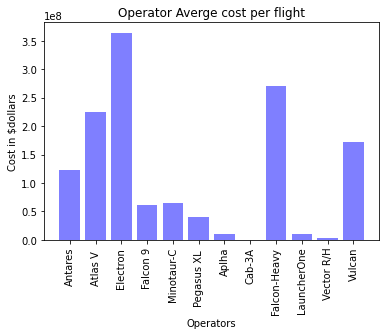

In [280]:
x_values = clean_set_one['Vehicle']
y_values = clean_set_one['Average_Cost']

plt.bar(x_values,y_values,color='b',align="center",alpha=0.5)
plt.xticks(x_values,x_values,rotation='vertical')
plt.title("Operator Averge cost per flight")
plt.xlabel("Operators")
plt.ylabel("Cost in $dollars")


In [266]:
clean_set_one['Average_Capcity'] = clean_set_one['Min_Mass_to_LEO_KG'] + clean_set_one['Max_Mass_to_LEO_kg']/2
clean_set_one

,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max,Average_Cost,Average_Capcity
0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0,122500000,7000.0
1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0,225000000,17530.0
2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0,364000000,75.0
3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0,61200000,6575.0
4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0,65000000,2007.0
5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0,40000000,225.0
6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0,10000000,500.0
7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0,250000,2.5
8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0,270000000,31900.0
9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0,10000000,250.0


In [267]:
clean_set_one['Average_Capcity'] = clean_set_one['Average_Capcity'].astype(int)
clean_set_one.dtypes


Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Cost_Min                float64
Cost_Max                float64
Average_Cost              int32
Average_Capcity           int32
dtype: object

Text(0, 0.5, 'Average Capcity')

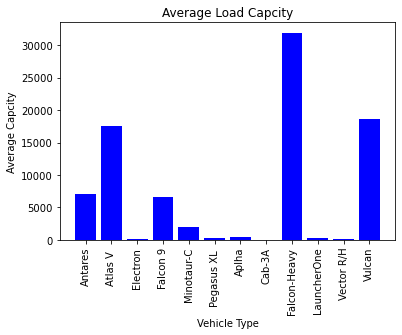

In [269]:
vehicle_type = clean_set_one['Vehicle']
Av_KG = clean_set_one['Average_Capcity']

plt.bar(vehicle_type,Av_KG,color='b',)
plt.xticks(vehicle_type,rotation='vertical')
plt.title("Average Load Capcity")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Capcity")

In [271]:
clean_set_one['Average_Per_KG'] = clean_set_one['Average_Cost']/clean_set_one['Average_Capcity']
clean_set_one['Average_Per_KG'] = clean_set_one['Average_Per_KG'].astype(int)
clean_set_one

,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max,Average_Cost,Average_Capcity,Average_Per_KG
0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0,122500000,7000,17500
1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0,225000000,17530,12835
2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0,364000000,75,4853333
3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0,61200000,6575,9307
4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0,65000000,2007,32386
5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0,40000000,225,177777
6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0,10000000,500,20000
7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0,250000,2,125000
8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0,270000000,31900,8463
9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0,10000000,250,40000


Text(0, 0.5, 'Average Capcity')

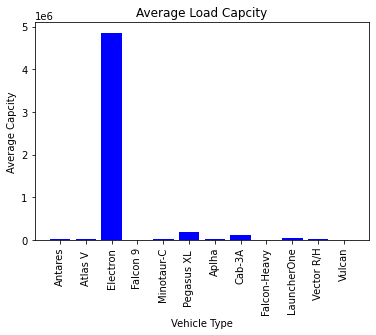

In [276]:
vehicle_type = clean_set_one['Vehicle']
cost_Kg = clean_set_one['Average_Per_KG']

plt.bar(vehicle_type,cost_Kg,color='b',)
plt.xticks(vehicle_type,rotation='vertical')
plt.title("Average Load Capcity")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Capcity")